<h1 align='center' style='color:#5390d9'>All About Seaborn</h1>

<h2 style='color:#56cfe1'>Importing Packages</h2>

In [1]:
# Dealing wth Data
import pandas as pd
import numpy as np

# For Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [2]:
np.random.seed(42)
data1 = np.random.randn(100)
data2 = np.random.randn(100)
data3 = np.random.randn(100)

<h2 style='color:#56cfe1'>Loading Data</h2>

In [3]:
df = sns.load_dataset('penguins')
synthesis = pd.DataFrame({'var1':data1,'var2':data2,'var3':data3})   # wideform
a = synthesis.stack().reset_index(-1)

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<h1 align='center' style='color:#5390d9'>Visualization</h1>

<h3 style='color:#56cfe1'>1. Distribution Plot </h3>
<br>

`With the help of examples, we will try to show different distribution plots.`

<h3 style='color:#5390d9'>1.1 Hist Plot

''

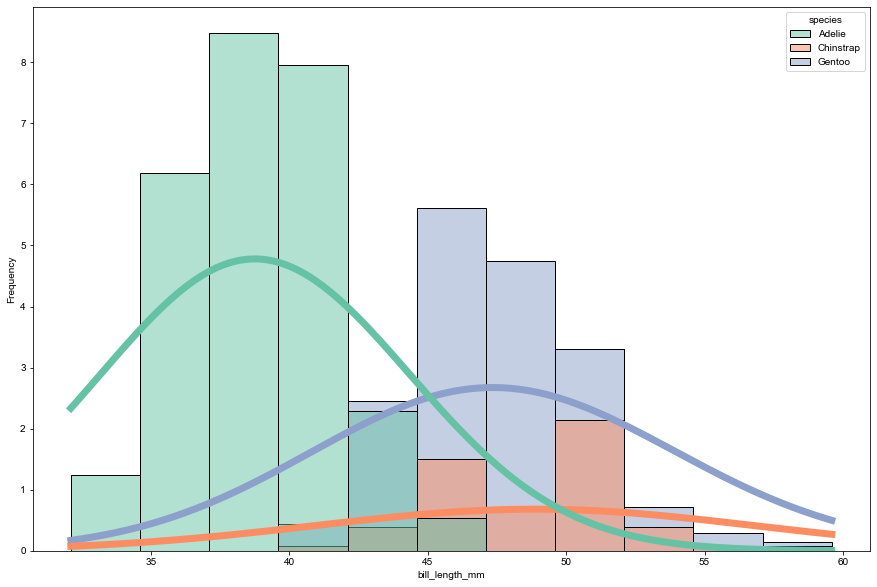

In [5]:
#long Format Data
fig, ax = plt.subplots(figsize=(15, 10))

sns.histplot(data= df,                 # Dataframe 
             kde=True,                 # Drawing Kernel Density Estimiation Line
             stat='frequency',         # Y-Axis is the frequency   (Other options: 'count', 'frequency', 'density', 'probability')
             x='bill_length_mm',       # Column of DataFrame we want to visualize
             hue='species',            # The Categorical Column
             multiple='layer',         # How to display diffrent categories of Data
             kde_kws={'bw_adjust':5},  # Adjust the Smoothness of KDE Curve
            line_kws={'linewidth':7},  # Adjust the Aesthetic Element of KDE Curv
             palette='Set2',           # Choose Color Map 
             ax=ax)                    # The ax object we want to draw on

;

''

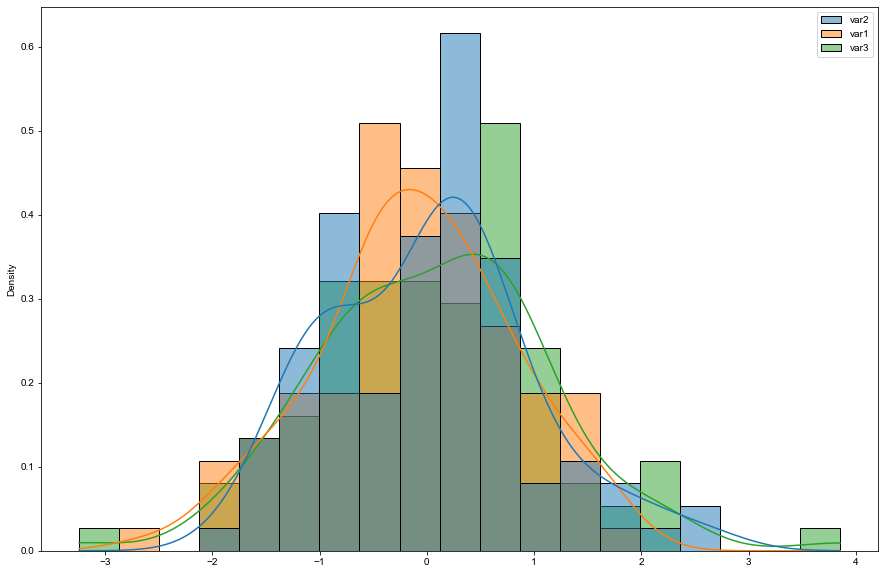

In [6]:
#Wide-Format Data
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(data=synthesis,
             kde=True,
             stat='density',
             common_norm=False,                # Sum of all category is equal to 1 for each category
             hue_order=['var2','var1','var3'], # The order to map category to colormap
             multiple='layer', 
             ax=ax)

;

<h3 style='color:#5390d9'>1.2 Kernel Density Curve Plot

''

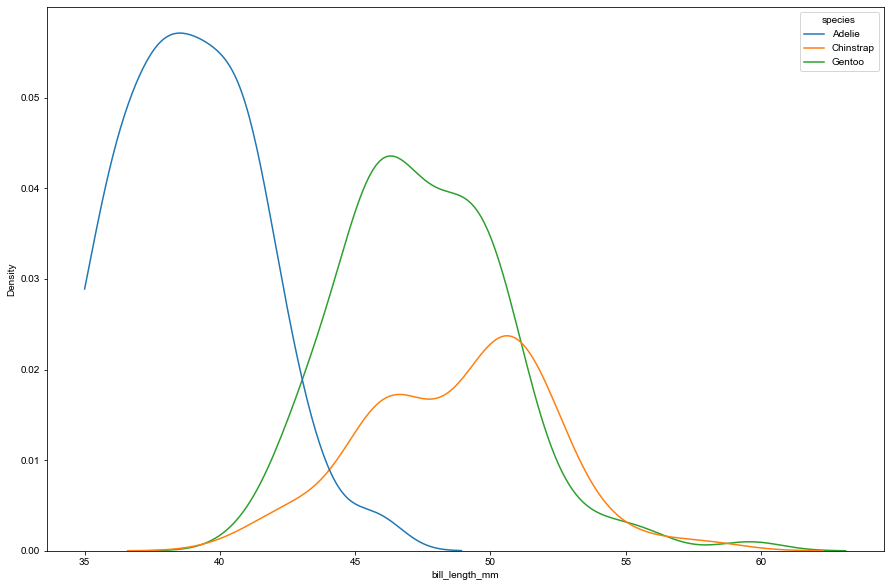

In [7]:
#Only Kernel Density Curve
fig, ax= plt.subplots(figsize=(15, 10))
sns.kdeplot(data=df,
            x='bill_length_mm',
            hue='species',
            clip=(35,100),             # The range within which curve will be displayed
            ax=ax)
;

<h3 style='color:#5390d9'>1.3 Rugplot

''

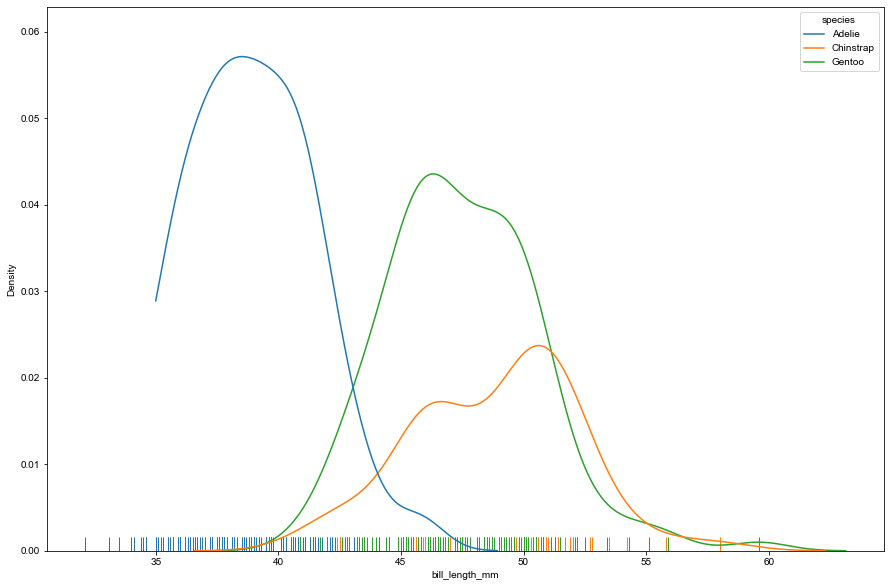

In [8]:
#Rugplot
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(data=df,
            x='bill_length_mm',
            hue='species',
            clip=(35,100),             # The range within which curve will be displayed
            ax=ax)

sns.rugplot(data=df,
            x='bill_length_mm',
            hue='species',
            ax=ax)
;

<h3 style='color:#56cfe1'>2. Categorical Plot

<h3 style='color:#5390d9'>2.1 Swarm Plot

''

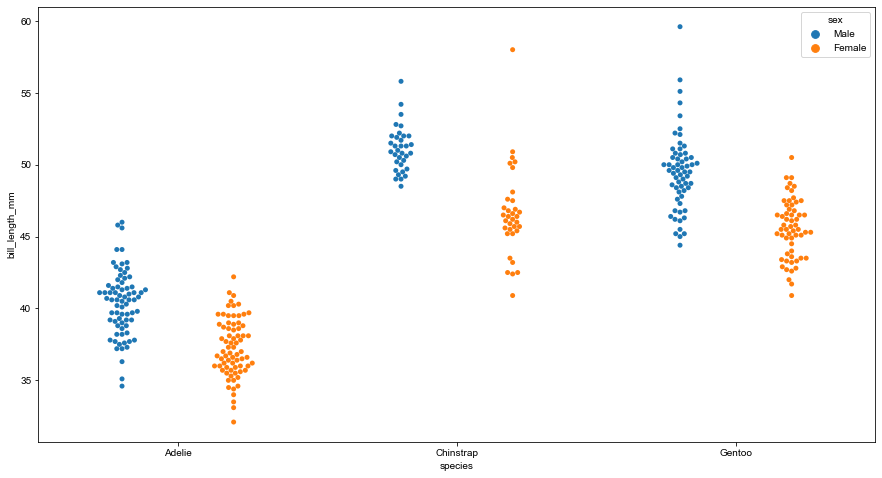

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.swarmplot(data=df,
             x='species',
             y='bill_length_mm',
             hue='sex',
             dodge=True)          # Seperating different hue's
;

<h3 style='color:#5390d9'>2.2 Violin Plot

''

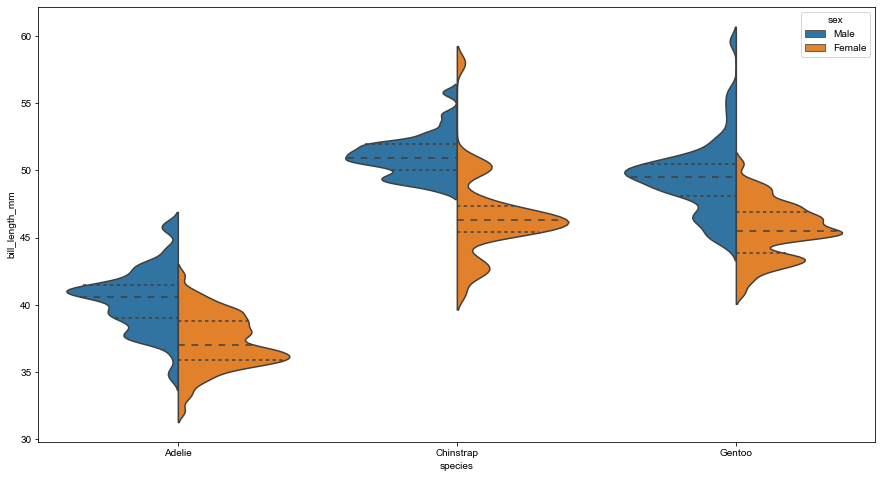

In [10]:
#Violin Plot

fig,ax=plt.subplots(figsize=(15,8))
sns.violinplot(data=df,
              x='species', 
              y='bill_length_mm',
              hue='sex',
              split=True,             # We split different hues on different side of categories
              bw=0.2,                 # The Smoothness of Violin Body
              inner='quartile',       # Show the Quartile Lines (Other values: 'box', 'point', 'stick')
              scale_hue=True,         # Scale across each hue instead of all violins
              scale='count')          # Scale the width of each violin (Other Values: 'area', 'count', 'width')
;

<h3 style='color:#5390d9'>2.3 Point Plot

''

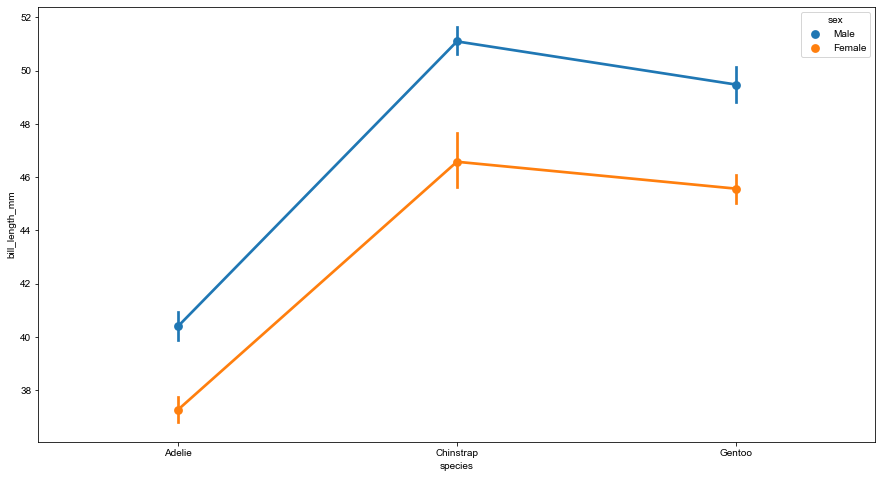

In [11]:
# Point Plot

fig, ax = plt.subplots(figsize=(15, 8))
sns.pointplot(data=df,
             x='species',
             y='bill_length_mm',
             hue='sex')
;

<h3 style='color:#56cfe1'>3. Regression Plot

''

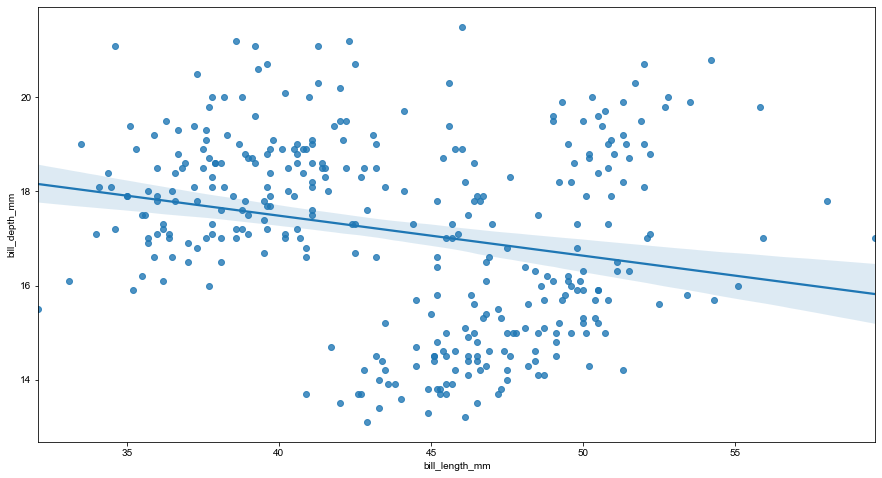

In [12]:
fig, ax= plt.subplots(figsize=(15, 8))
sns.regplot(data=df,
           x='bill_length_mm', 
           y='bill_depth_mm')
;

<h3 style='color:#56cfe1'>4. Heatmap

''

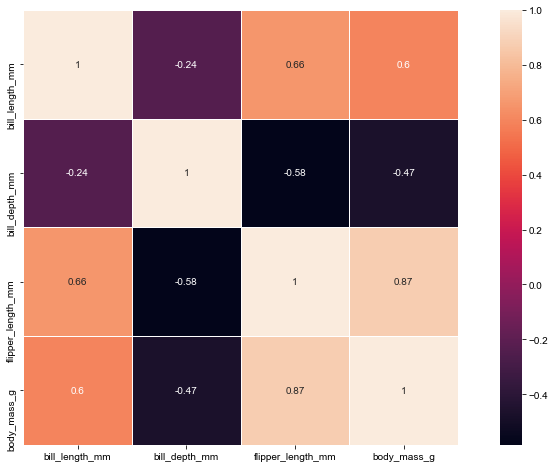

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(data=df.corr(), 
           annot=True, 
           linewidths=0.5,
           square=True,
           yticklabels=True,)
;

''

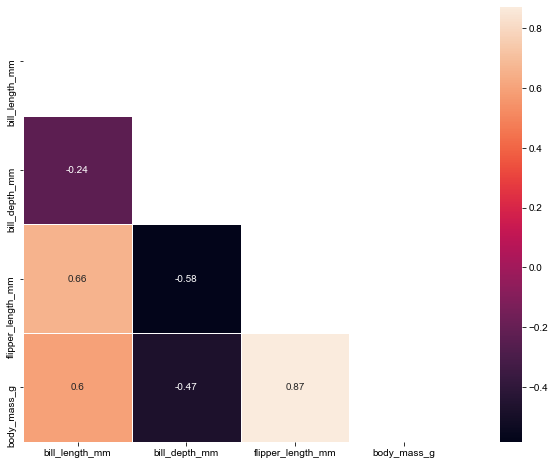

In [14]:
#With Mask
mask = np.triu(np.ones_like(df.corr()))
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(data=df.corr(), 
           annot=True, 
           linewidths=0.5,
           square=True,
           yticklabels=True,
           mask=mask)
;

<h3 style='color:#56cfe1'>5. Cluster Heatmap

''

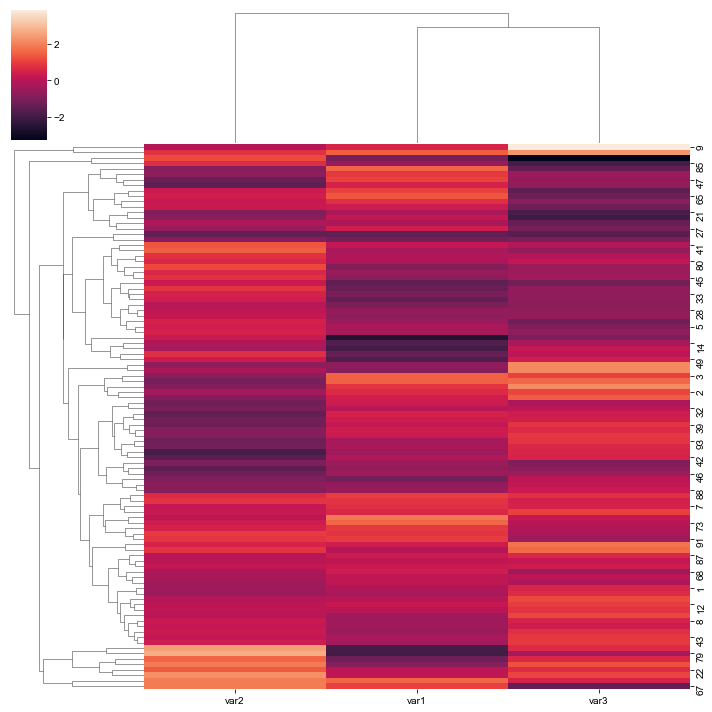

In [15]:
#Cluster Heatmap
sns.clustermap(data=synthesis)
;

<h3 style='color:#56cfe1'>6. Pair Plot

''

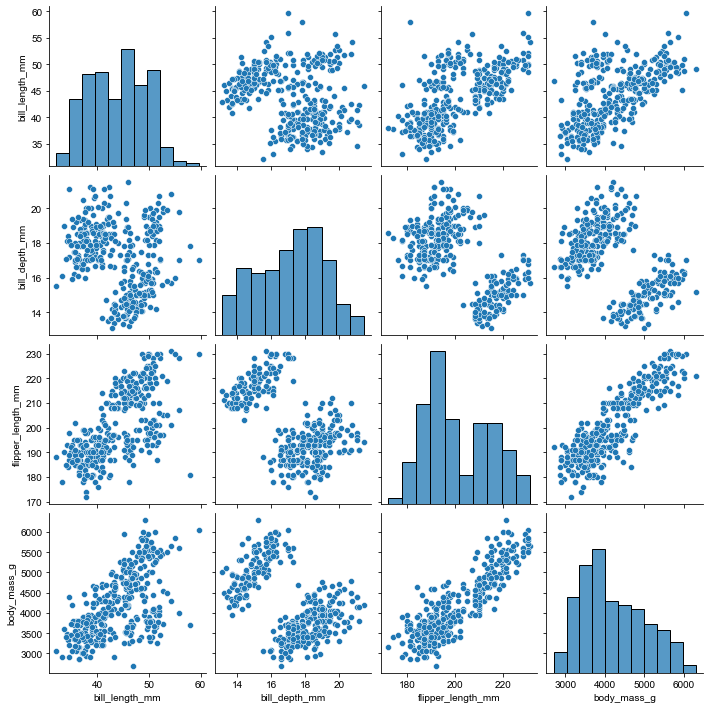

In [16]:
#Pair PLot
sns.pairplot(data=df, dropna=True)
;

<h3 style='color:#56cfe1'>7. Joint Plot

''

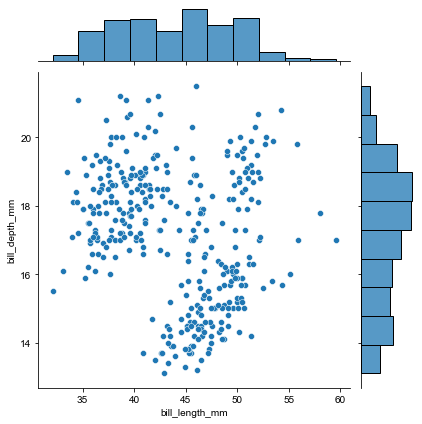

In [17]:
#Joint Plot
sns.jointplot(data=df, 
             x='bill_length_mm',
             y='bill_depth_mm',
             kind='scatter')
;

''

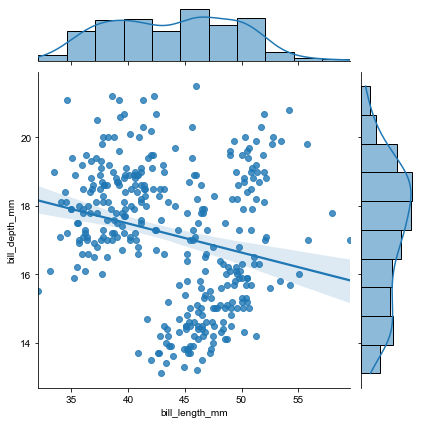

In [18]:
#Joint Plot + KDE Curve + Regression Line
sns.jointplot(data=df, 
             x='bill_length_mm',
             y='bill_depth_mm',
             kind='reg')
;